In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data)
n, m = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:m]
X_dev = X_dev / 255

data_train = data[1000:n].T
Y_train = data_train[0]
X_train = data_train[1:m]
X_train = X_train / 255


In [4]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def deriv_ReLU(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / n * dZ2.dot(A1.T)
    db2 = 1 / n * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / n * dZ1.dot(X.T)
    db1 = 1 / n * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1,b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


In [5]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    accuracy = np.sum(predictions == Y) / Y.size
    return accuracy

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iterations: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y)*100)
    return W1, b1, W2, b2        
        

In [ ]:
import time
start_time = time.time()
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)
end_time = time.time()
print(f"Time: {(end_time - start_time):f2}")

Iterations:  0
[3 2 2 ... 2 2 7] [6 7 2 ... 2 2 9]
9.953658536585367
Iterations:  10
[3 9 2 ... 6 2 7] [6 7 2 ... 2 2 9]
24.334146341463413
Iterations:  20
[3 1 2 ... 6 5 7] [6 7 2 ... 2 2 9]
34.207317073170735
Iterations:  30
[6 1 2 ... 6 5 9] [6 7 2 ... 2 2 9]
42.13414634146341
Iterations:  40
[6 1 2 ... 6 4 9] [6 7 2 ... 2 2 9]
48.55121951219512
Iterations:  50
[6 1 2 ... 2 4 9] [6 7 2 ... 2 2 9]
54.15365853658537
Iterations:  60
[6 1 2 ... 2 4 9] [6 7 2 ... 2 2 9]
58.84146341463414
Iterations:  70
[6 1 2 ... 2 4 9] [6 7 2 ... 2 2 9]
62.47317073170732
Iterations:  80
[6 1 2 ... 2 4 9] [6 7 2 ... 2 2 9]
65.37073170731708
Iterations:  90
[6 1 2 ... 2 4 9] [6 7 2 ... 2 2 9]
67.69512195121952
Iterations:  100
[6 1 2 ... 2 4 9] [6 7 2 ... 2 2 9]
69.60243902439024
Iterations:  110
[6 1 2 ... 2 4 9] [6 7 2 ... 2 2 9]
71.23170731707317
Iterations:  120
[6 1 2 ... 2 4 9] [6 7 2 ... 2 2 9]
72.57073170731707
Iterations:  130
[6 1 2 ... 2 4 9] [6 7 2 ... 2 2 9]
73.70243902439024
Iterations:  14

In [7]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


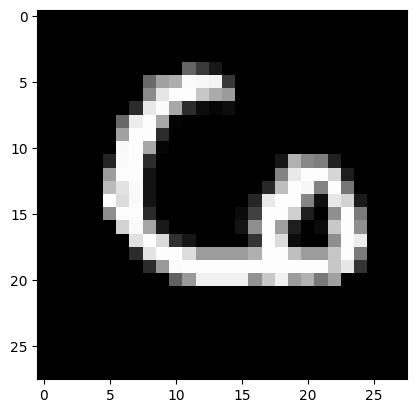

Prediction:  [9]
Label:  7


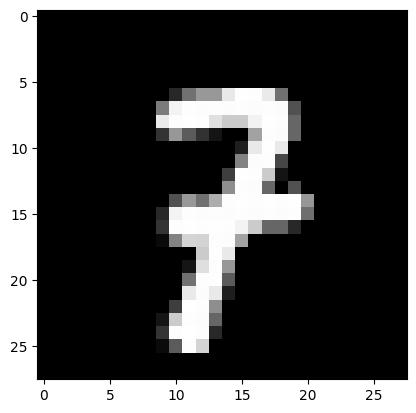

Prediction:  [2]
Label:  2


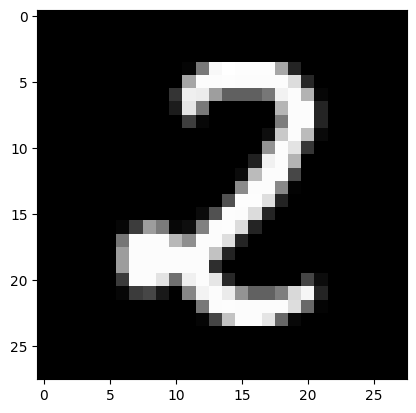

Prediction:  [3]
Label:  3


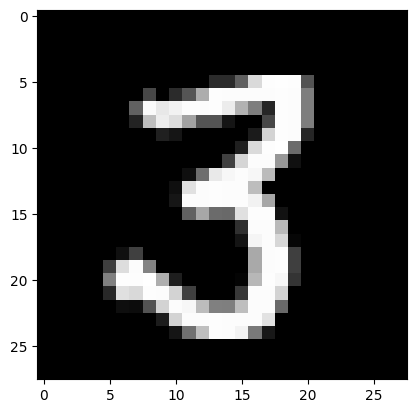

In [8]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [9]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[0 4 0 3 4 4 0 4 4 6 9 4 0 7 6 3 1 2 9 8 7 8 6 5 2 3 7 5 4 9 9 1 7 8 8 1 2
 0 9 2 0 0 4 3 3 6 5 6 6 4 8 3 0 8 7 7 1 4 3 6 2 6 4 6 9 8 1 7 0 1 1 0 6 9
 0 1 8 3 4 7 2 3 8 8 2 1 8 3 3 1 9 9 6 6 8 6 9 1 2 1 5 5 8 9 5 5 7 8 5 1 9
 0 0 1 8 5 9 4 1 1 6 6 4 0 2 5 5 1 5 1 2 2 3 0 2 9 5 7 2 9 2 1 4 5 4 6 8 6
 4 7 1 8 1 8 8 9 1 0 8 3 1 2 7 6 0 7 6 2 0 8 8 5 5 3 9 1 9 2 8 2 7 7 7 3 1
 1 4 9 6 4 8 0 6 8 9 9 9 2 5 6 0 6 4 6 1 3 8 1 7 1 6 9 1 5 3 9 4 5 1 5 0 5
 2 6 8 4 6 1 9 8 6 8 1 8 5 5 6 3 4 0 9 9 1 2 5 3 8 9 7 4 9 2 2 5 0 6 4 5 6
 4 7 1 9 0 0 5 6 4 8 2 9 3 0 1 1 5 4 3 1 1 4 4 2 3 3 4 9 6 0 4 9 5 5 7 6 1
 5 7 1 5 9 4 1 9 1 2 8 2 6 2 2 5 0 4 5 8 4 4 3 2 4 1 2 6 8 1 7 4 9 8 7 9 5
 8 6 0 8 8 3 4 5 4 5 2 8 6 6 9 5 5 4 4 6 3 1 4 9 4 7 0 5 8 0 0 1 2 7 1 6 9
 8 2 0 1 7 0 9 2 1 4 9 3 4 3 3 0 3 7 1 9 2 1 9 3 5 3 2 4 3 1 6 0 0 5 2 9 4
 7 0 9 3 0 3 9 3 1 0 7 1 6 5 7 1 5 5 7 2 8 3 3 2 9 5 4 6 8 9 2 8 9 3 4 2 4
 1 5 3 7 3 3 3 0 4 1 0 1 0 0 7 7 8 0 1 7 3 5 7 7 7 4 7 6 0 6 1 4 2 1 0 5 4
 2 5 1 3 7 6 7 9 8 2 3 1 

np.float64(0.867)

Prediction:  [4]
Label:  4


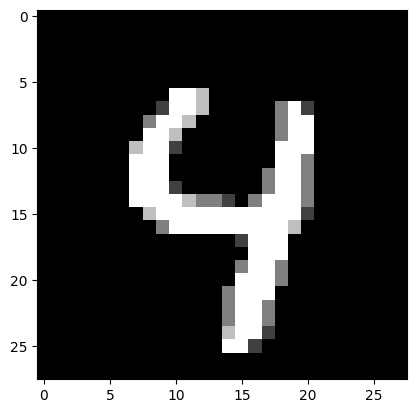

Prediction:  [0]
Label:  0


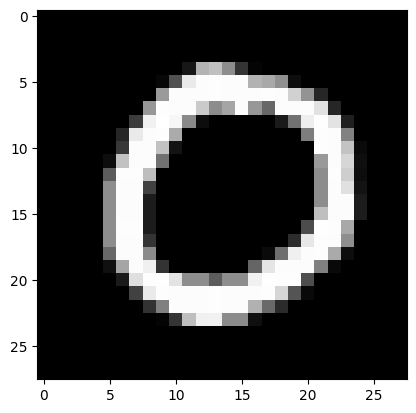

Prediction:  [2]
Label:  1


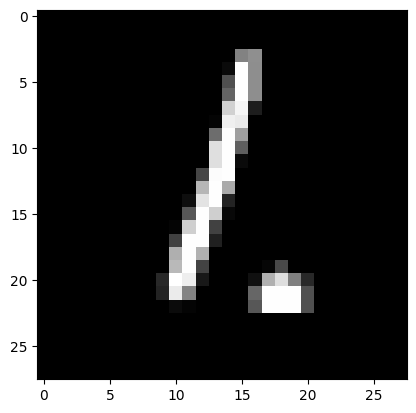

Prediction:  [7]
Label:  7


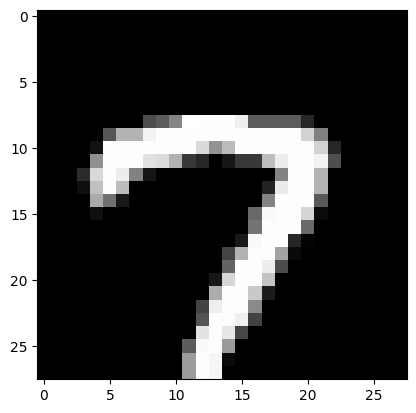

Prediction:  [9]
Label:  9


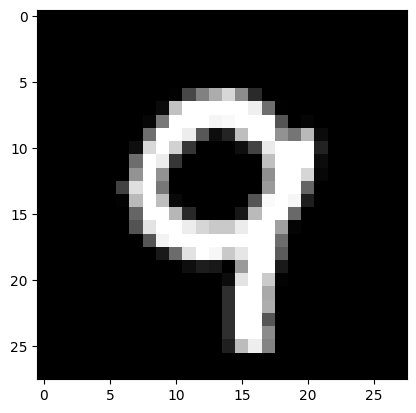

Prediction:  [1]
Label:  1


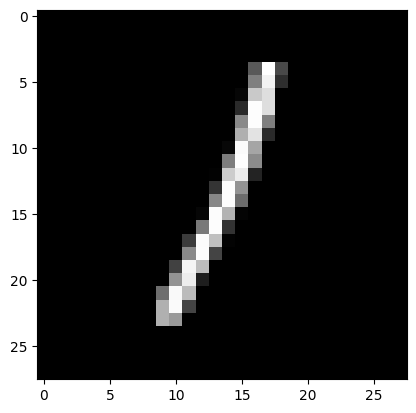

In [10]:
test_prediction(51, W1, b1, W2, b2)
test_prediction(52, W1, b1, W2, b2)
test_prediction(53, W1, b1, W2, b2)
test_prediction(54, W1, b1, W2, b2)
test_prediction(55, W1, b1, W2, b2)
test_prediction(56, W1, b1, W2, b2)

In [11]:
print(W1, b1, W2, b2)

[[ 0.27919104 -0.08750487 -0.08522131 ... -0.09441473 -0.20545717
  -0.30374541]
 [-0.45437305  0.04124606 -0.06972314 ...  0.21140967 -0.29186384
  -0.39560576]
 [-0.41109202  0.22198976 -0.4368768  ...  0.01906005  0.38719316
  -0.1741977 ]
 ...
 [-0.05347759 -0.33801044 -0.334747   ...  0.13929551 -0.41626324
  -0.20014343]
 [ 0.14484137  0.31187203  0.3357958  ... -0.31501432  0.02074512
   0.42474272]
 [-0.18480419 -0.24399754  0.48382137 ... -0.28200007 -0.48468302
   0.13420688]] [[0.34401423]
 [1.01898165]
 [0.77598443]
 [0.23287521]
 [0.81825405]
 [0.88103716]
 [0.48961494]
 [0.95688537]
 [0.68447953]
 [0.73489152]] [[-1.31566576e-01  3.64889728e-01  6.21790986e-01  1.34915807e-01
  -1.39049865e-01  2.55227875e-01  2.34221177e-02  4.14478705e-01
  -2.62145883e-02 -9.41413626e-01]
 [ 2.43348700e-01 -2.37691155e-01 -6.95124092e-01 -8.37340735e-01
   2.28882973e-01 -1.94382331e-01 -3.95698256e-01 -7.91242657e-02
   3.95891159e-01  7.18059430e-01]
 [-1.08426990e-02 -2.12727351e-01